In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as po

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
# 판매 데이터 전처리 함수
def sales_preprocessing(x):
  if 'K' in x:
    return float(x.replace('K',''))*0.001
  elif 'M' in x:
    return float(x.replace('M',''))
  else:
    return float(x)

def year_preprocessing(x):
  if (x >= 0) & (x < 40):
    return int(2000 + x)
  elif (x > 70) & (x < 1000):
    return int(1900 + x)
  else:
    return int(x)

## 데이터 불러오기

In [ ]:
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
data =  pd.read_csv(url, index_col = 0)

In [ ]:
data = data.reset_index(drop = True)

# 출고량 데이터 -> 수치형으로 변환
num_col = ['NA_Sales','EU_Sales',	'JP_Sales',	'Other_Sales']
for i in num_col:
  data[i] = data[i].apply(sales_preprocessing)
  data[i] = data[i].astype('float64')
data.head()

Name  ... Other_Sales
0                    Candace Kane's Candy Factory  ...        0.00
1                                  The Munchables  ...        0.01
2  Otome wa Oanesama Boku ni Koi Shiteru Portable  ...        0.00
3                Deal or No Deal: Special Edition  ...        0.00
4       Ben 10 Ultimate Alien: Cosmic Destruction  ...        0.04

[5 rows x 9 columns]

## 데이터 확인하기

In [ ]:
data.shape

(16598, 9)

In [ ]:
data.describe().T

count         mean         std  ...      50%      75%      max
Year         16327.0  1994.242543  155.077168  ...  2007.00  2010.00  2020.00
NA_Sales     16598.0     0.264667    0.816683  ...     0.08     0.24    41.49
EU_Sales     16598.0     0.146652    0.505351  ...     0.02     0.11    29.02
JP_Sales     16598.0     0.077782    0.309291  ...     0.00     0.04    10.22
Other_Sales  16598.0     0.048063    0.188588  ...     0.01     0.04    10.57

[5 rows x 8 columns]

In [ ]:
data.describe(include=['object'])

Name Platform   Genre        Publisher
count                         16598    16598   16548            16540
unique                        11493       31      12              578
top     Need for Speed: Most Wanted       DS  Action  Electronic Arts
freq                             12     2163    3305             1351

In [ ]:
data.Platform.unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
col = ['Name',	'Platform',	'Year',	'Genre',	'Publisher']
for i in col:
  print('\n',data[i].unique())


 ["Candace Kane's Candy Factory" 'The Munchables'
 'Otome wa Oanesama Boku ni Koi Shiteru Portable' ...
 'White Album: Tsuzurareru Fuyu no Omoide' 'Minna no Chizu 2'
 'Rainbow Islands: Revolution']

 ['DS' 'Wii' 'PSP' 'PS3' 'PC' 'PS' 'GBA' 'PS4' 'PS2' 'XB' 'X360' 'GC' '3DS'
 '2600' 'SAT' 'GB' 'NES' 'DC' 'N64' 'XOne' 'SNES' 'WiiU' 'PSV' 'GEN' 'SCD'
 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

 [2.008e+03 2.009e+03 2.010e+03 2.005e+03 2.011e+03 2.007e+03 2.001e+03
 2.003e+03 2.006e+03 2.014e+03 2.015e+03 2.002e+03 1.997e+03 2.013e+03
 1.996e+03 2.004e+03 2.000e+03       nan 1.984e+03 1.998e+03 2.016e+03
 1.985e+03 1.999e+03 9.000e+00 9.700e+01 1.995e+03 1.993e+03 2.012e+03
 1.987e+03 1.982e+03 1.100e+01 1.994e+03 1.990e+03 1.500e+01 1.992e+03
 1.991e+03 1.983e+03 1.988e+03 1.981e+03 3.000e+00 1.989e+03 9.600e+01
 6.000e+00 8.000e+00 1.986e+03 1.000e+00 5.000e+00 4.000e+00 1.000e+01
 9.800e+01 7.000e+00 1.600e+01 8.600e+01 1.400e+01 9.500e+01 2.017e+03
 1.980e+03 2.020e+03 2.000e+00 1.300e+01 0

### 결측치 확인하기

In [ ]:
# 각 칼럼별 변수의 갯수 확인
data.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

Text(0.5, 1.0, 'Total Missing Value (%)')

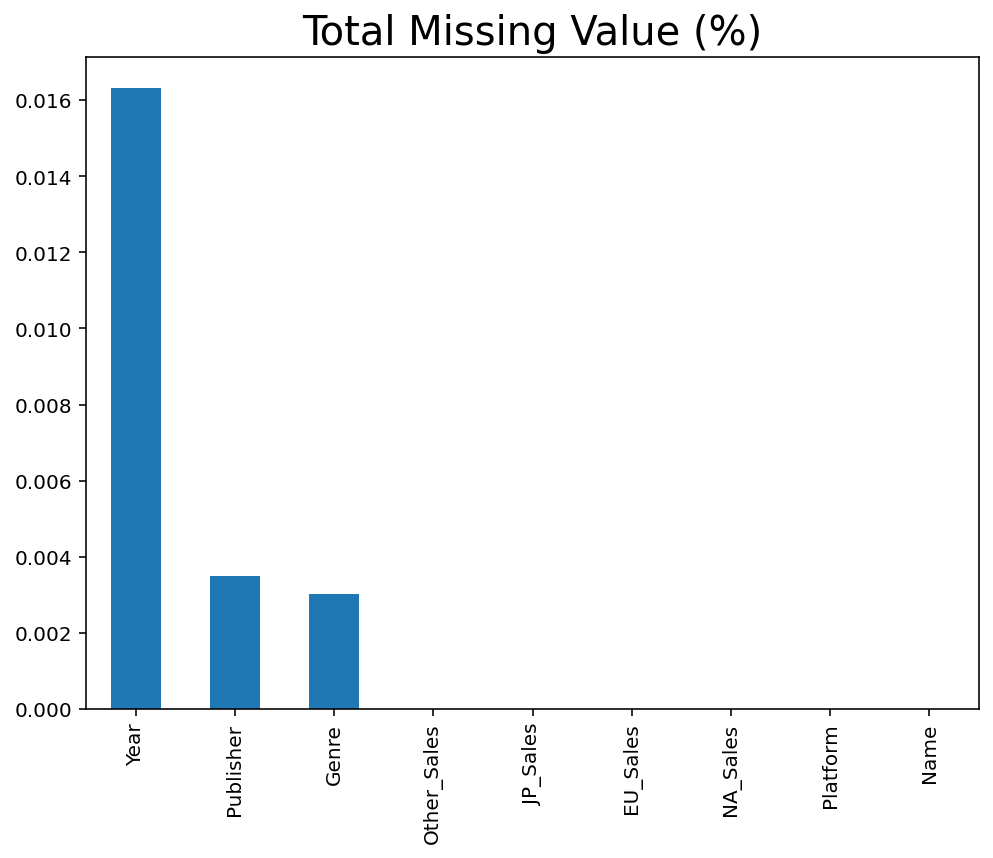

In [ ]:
# 결측치의 비율(영향)
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

# 매우 미미한 수준으로 어떠한 결측치 처리를 하더라도 크게 영향을 줄거 같지 않다.

### 중복값 확인

In [ ]:
data.duplicated().sum()

1

## 데이터 전처리

#### 공통

In [ ]:
# 같은 이름의 데이터를 가지고 결측치 처리
# 출시 플랫폼만 다르고 이름, 출시년도가 같은 점을 이용해 결측치를 처리
data['Year'] = data.groupby('Name')['Year'].transform('first')
data['Genre'] = data.groupby('Name')['Genre'].transform('first')
data['Publisher'] = data.groupby('Name')['Publisher'].transform('first')

In [ ]:
data.isnull().sum()

Name             0
Platform         0
Year           147
Genre           30
Publisher       51
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
data.isnull().sum()/len(data)

Name           0.000000
Platform       0.000000
Year           0.008856
Genre          0.001807
Publisher      0.003073
NA_Sales       0.000000
EU_Sales       0.000000
JP_Sales       0.000000
Other_Sales    0.000000
dtype: float64

In [ ]:
# 중복값 제거
data.drop_duplicates(inplace = True)

#### Year

In [ ]:
data[data.Year.isnull()].head()

Name  ... Other_Sales
31                                     Rock Band  ...        0.21
109   Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)  ...        0.00
273  Jewel Link Chronicles: Mountains of Madness  ...        0.01
430                                   Famista 64  ...        0.03
818                   Twisted Metal: Small Brawl  ...        0.01

[5 rows x 9 columns]

In [ ]:
year_data = data['Year']
max_entry = year_data.idxmax()
pd.DataFrame(data.iloc[max_entry]).T

Name Platform  Year  ... EU_Sales JP_Sales Other_Sales
6906  Imagine: Makeup Artist       DS  2020  ...        0        0        0.02

[1 rows x 9 columns]

In [ ]:
# 게임 발매년도 확인 결과 2020년이 아닌 -> 2009년
# 마찬가지로 발매년도가 2016년이지만 2017년으로 입력되어있다.
data['Year'] = np.where(data['Year']== 2020,2009, data['Year'])
data['Year'] = np.where(data['Year']== 2017,2016, data['Year'])

year_data = data['Year']
max_entry = year_data.idxmax()
pd.DataFrame(data.iloc[max_entry]).T

# 최대 발매년도는 2016년이다.

Name Platform  Year  ... EU_Sales JP_Sales Other_Sales
56  Sébastien Loeb Rally Evo      PS4  2016  ...     0.04        0        0.01

[1 rows x 9 columns]

In [ ]:
data[(data['Year'] >0)&(data['Year'] < 1900)].head()

Name  ... Other_Sales
74        Age of Empires III: Complete Collection  ...        0.03
81                          Treasures of the Deep  ...        0.01
213                              NASCAR Unleashed  ...        0.01
250                              NASCAR Unleashed  ...        0.01
304  Kung Fu Panda: Showdown of Legendary Legends  ...        0.00

[5 rows x 9 columns]

In [ ]:
# 년도 입력이 제대로 되지 않은 데이터 존재
# 80 이상의 숫자들은 1900년대, 그외 나머지 숫자들은 2000년대
data[data['Year'] < 1900].Year.unique()

array([ 9., 97., 11., 15.,  3., 96.,  8.,  1.,  6.,  5.,  4., 10.,  7.,
       16., 86., 14., 95., 13.,  0., 12., 94.])

In [ ]:
def df2dict(df):
    Platform_Year_dict = {}
    for k, v in zip(df.iloc[:, 0], df.iloc[:, 1]):
        Platform_Year_dict[k] = v
    return Platform_Year_dict

# 플랫폼별 년도의 중앙값을 이용해 결측치를 처리
Platform_Year = data.groupby('Platform')['Year'].agg(lambda x : x.median()).reset_index()
data['Year']= np.where(data['Year'].isnull(),data['Platform'].map(Platform_Year.set_index('Platform')['Year']),data['Year'])

In [ ]:
# 제대로 입력되어있지 않은 년도 수정, 정수형 타입으로 변경
data['Year'] = data['Year'].apply(year_preprocessing)
data['Year'] = data['Year'].astype('int64')

#### Genre

In [ ]:
data[data.Genre.isnull()].Name.unique()

array(['Ape Escape: On the Loose', 'SingStar Singalong With Disney',
       'Pokemon X/Pokemon Y', 'NASCAR Racing',
       'Jurassic Park III: Island Attack', 'The Godfather: Dons Edition',
       'Princess Saver! Eternal Love for My Lady',
       'Brain Quest: Grades 5 & 6', 'Wii Party', 'Astonishia Story',
       'Chrono Cross', 'Medabots: Metabee', 'UFO: Trilogy',
       'Largo Winch .// Commando Sar', 'Ukiyo no Shishi',
       'Myth Makers: Orbs of Doom', 'Final Fantasy XII',
       'Bakemonogatari Portable', 'Puppy Palace', 'Yakuza 3', 'F-Zero X',
       'Onimusha: Warlords', 'Virtual Chess 64',
       'PQ2: Practical Intelligence Quotient', 'Urban Chaos',
       'Treasure Report: Kikai Jikake no Isan',
       'Myth Makers: Super Kart GP', 'WarioWare, Inc.: Mega Party Game$',
       'Bloodborne', 'Brain Boost: Beta Wave'], dtype=object)

In [ ]:
# 포켓몬 데이터만은 꼭 사용하고 싶어서 따로 설정해줌
data['Genre'] = np.where(data['Name']== 'Pokemon X/Pokemon Y','Role-Playing', data['Genre'])

In [ ]:
# 최빈값으로 처리
print(data['Genre'].mode()[0]) #Action이 가장 많이 사용되는 장르
data.Genre.fillna(data['Genre'].mode()[0],inplace=True)

Action


#### Publisher

In [ ]:
data[data.Publisher.isnull()].head()

Name  ... Other_Sales
272                                  UK Truck Simulator  ...        0.00
1313     All Grown Up!: Game Boy Advance Video Volume 1  ...        0.00
1560  Teenage Mutant Ninja Turtles: Game Boy Advance...  ...        0.00
1789  Nicktoons Collection: Game Boy Advance Video V...  ...        0.00
1961  Nicktoons Collection: Game Boy Advance Video V...  ...        0.01

[5 rows x 9 columns]

In [ ]:
#이미 Unknown이라는 Publisher 데이터가 존재하기에 사용
data.Publisher.fillna('Unknown',inplace=True) 

In [ ]:
data.describe().T

count         mean       std  ...      50%      75%      max
Year         16597.0  2006.398506  5.836686  ...  2007.00  2010.00  2016.00
NA_Sales     16597.0     0.264683  0.816705  ...     0.08     0.24    41.49
EU_Sales     16597.0     0.146661  0.505365  ...     0.02     0.11    29.02
JP_Sales     16597.0     0.077785  0.309300  ...     0.00     0.04    10.22
Other_Sales  16597.0     0.048066  0.188594  ...     0.01     0.04    10.57

[5 rows x 8 columns]

In [ ]:
data.describe(include=['object'])

Name Platform   Genre        Publisher
count                         16597    16597   16597            16597
unique                        11493       31      12              566
top     Need for Speed: Most Wanted       DS  Action  Electronic Arts
freq                             12     2163    3336             1371

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16597 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16597 non-null  int64  
 3   Genre        16597 non-null  object 
 4   Publisher    16597 non-null  object 
 5   NA_Sales     16597 non-null  float64
 6   EU_Sales     16597 non-null  float64
 7   JP_Sales     16597 non-null  float64
 8   Other_Sales  16597 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.3+ MB


### 새로운 변수 추가

In [ ]:
# 글로벌 전체 출고량 
data['Global_Sales'] = data['NA_Sales']+data['EU_Sales']+data['JP_Sales']+data['Other_Sales']

In [ ]:
data.corr()

Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year          1.000000 -0.083101  0.011216 -0.158946     0.045555     -0.066083
NA_Sales     -0.083101  1.000000  0.767725  0.449786     0.634736      0.941049
EU_Sales      0.011216  0.767725  1.000000  0.435583     0.726384      0.902838
JP_Sales     -0.158946  0.449786  0.435583  1.000000     0.290184      0.611820
Other_Sales   0.045555  0.634736  0.726384  0.290184     1.000000      0.748350
Global_Sales -0.066083  0.941049  0.902838  0.611820     0.748350      1.000000

In [ ]:
# 기기 타입 - 콘솔, 휴대용, 컴퓨터
consoles  = ['2600', '3DO', 'DC', 'GC', 'GEN', 'N64', 'NES', 'NG', 'PCFX', 'PS', 'PS2', 'PS3',
             'PS4', 'SAT', 'SCD', 'SNES', 'TG16', 'Wii','WiiU', 'X360', 'XB', 'XOne', 'X']
handhelds = ['3DS', 'DS', 'GB', 'GBA', 'GG', 'PSP', 'PSV', 'WS', 'G']
pc   = ['PC']

data['Platform'] = np.where(((data.Platform == 'PS')&(data.Year < 1990)),'2600', data['Platform'])

def p_type(x):
  if x in consoles:
    return 'Consoles'
  elif x in handhelds:
    return 'Handhelds'
  elif x in pc:
    return 'PC'


data['Platform_Type'] = data['Platform'].apply([p_type])

data.head()

Name  ... Platform_Type
0                    Candace Kane's Candy Factory  ...     Handhelds
1                                  The Munchables  ...      Consoles
2  Otome wa Oanesama Boku ni Koi Shiteru Portable  ...     Handhelds
3                Deal or No Deal: Special Edition  ...     Handhelds
4       Ben 10 Ultimate Alien: Cosmic Destruction  ...      Consoles

[5 rows x 11 columns]

In [ ]:
# 현재 게임 시장을 주도하는 콘솔 종류

xbox = ["X360", "XB", "XOne"]
nintendo = ["Wii", "WiiU", "N64", "GC", "NES"] 
playstation = ["PS", "PS2", "PS3", "PS4"]
handhelds = ['3DS', 'DS', 'GB', 'GBA', 'GG', 'PSP', 'PSV', 'WS', 'G']

def c_type(x):
  if x in xbox:
    return 'Xbox'
  elif x in nintendo:
    return 'Nintendo'
  elif x in playstation:
    return 'Playstation'
  elif x in pc:
    return 'PC'
  elif x in handhelds:
    return 'Handhelds'
  else: 
    return 'Others'

data['Console_Type'] = data['Platform'].apply([c_type])

data.head()


Name  ... Console_Type
0                    Candace Kane's Candy Factory  ...    Handhelds
1                                  The Munchables  ...     Nintendo
2  Otome wa Oanesama Boku ni Koi Shiteru Portable  ...    Handhelds
3                Deal or No Deal: Special Edition  ...    Handhelds
4       Ben 10 Ultimate Alien: Cosmic Destruction  ...  Playstation

[5 rows x 12 columns]

## 시각화

In [ ]:
fig = make_subplots(rows = 2, cols = 1)
#fig.add_trace(go.Scatter(x=data["Genre"], y=data["NA_Sales"],mode = 'markers', text= data.Name, name = 'North America'))
#fig.add_trace(go.Scatter(x=data["Genre"], y=data["EU_Sales"],mode = 'markers', text= data.Name, name = 'EU'))
#fig.add_trace(go.Scatter(x=data["Genre"], y=data["JP_Sales"],mode = 'markers', text= data.Name, name = 'Japan'))
#fig.add_trace(go.Scatter(x=data["Genre"], y=data["Other_Sales"],mode = 'markers', text= data.Name, name = 'Other'))
fig.add_trace(go.Scatter(x=data["Year"], y=data["Global_Sales"],mode = 'markers', text= data.Name, name = 'Global Sales'), row=1, col=1
)

fig.add_trace(go.Scatter(x=data["Genre"], y=data["Global_Sales"],mode = 'markers', text= data.Name, name = 'Genre Sales'),  row=2, col=1
)

fig.update_layout(template = "plotly_white", title="Game",)


po.write_html(fig, file ='./Game.html')
fig.show()

In [ ]:
z = data.pivot_table(index='Year', columns='Platform_Type', values='Global_Sales', aggfunc = 'count', fill_value=0)
z.columns.name = None
z = z.reset_index()

z['Consoles'] = z['Consoles'].rolling(min_periods=1, window=11).sum()
z['PC'] = z['PC'].rolling(min_periods=1, window=11).sum()
z['Handhelds'] = z['Handhelds'].rolling(min_periods=1, window=11).sum()

x = z.Year
Console = z.Consoles
PC = z.PC
Handhelds = z.Handhelds

fig = make_subplots(rows = 1, cols = 1)

#fig.add_trace(go.Scatter(x = x, y =  genre["NA_Sales"], mode="lines+markers",  name='North America'))
#fig.add_trace(go.Scatter(x = x, y =  genre["EU_Sales"], mode="lines+markers", name='EU'))
#fig.add_trace(go.Scatter(x = x, y =  genre["JP_Sales"], mode="lines+markers",  name='Japan'))
#fig.add_trace(go.Scatter(x = x, y =  genre["Other_Sales"], mode="lines+markers", name='Others'))
# fig.add_trace(go.Scatter(x = x, y =  genre["Global_Sales"], mode="lines+markers",  name='Global'))

fig.add_trace(go.Bar(
    x=x,
    y=Console,
    name="Consoles" ,
    xaxis='x2', yaxis='y2',
    opacity=0.75),)

fig.add_trace(go.Bar(
    x=x,
    y=Handhelds,
    name="Handhelds" ,
    xaxis='x2', yaxis='y2',
    opacity=0.75))

fig.add_trace(go.Bar(
    x=x,
    y=PC,
    name="PC" ,
    xaxis='x2', yaxis='y2',
    opacity=0.75),)

fig.update_layout(template = "plotly_white", title="Platform Growth",
        width=900,
        height=600,
       )

fig.update_layout(barmode='stack')

po.write_html(fig, file ='./Platform Growth.html')
fig.show()

* 80 년대부터 대부분의 비디오 게임은 콘솔 게임이었다.
* 시간이 지나면서 휴대용 게임과 PC게임이 많은 관심을 받기 시작
* 이유는 기술적인 부분과 연관 있는 것으로 보인다. 80년대와 90년대만 해도 휴대용 게임기는 없었고 PC는 게임용으로 설계되지 않았다.
* 2000년 이후 기술이 발전하면서 PC & 휴대용 게임은 크게 성장했다.
* 게임과 기술의 발전은 아주 밀접한 연관이 있다.
* 뒤에서 볼 플랫폼 그래프만 봐도 새로운 기기(새로운 기술) 출시는 게임 판매량에 많은 영향을 준다.


In [ ]:
z = data.pivot_table(index='Year', columns='Platform_Type', values='Global_Sales', aggfunc = 'count', fill_value=0)
z.columns.name = None
z = z.reset_index()

fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(go.Scatter(x = z.Year, y =  z['Consoles'], mode="lines+markers",  name='Consoles'))
fig.add_trace(go.Scatter(x = z.Year, y =  z['Handhelds'], mode="lines+markers", name='Handhelds'))
fig.add_trace(go.Scatter(x = z.Year, y =  z['PC'], mode="lines+markers",  name='PC'))


fig.add_trace(go.Scatter(x=[2011],y=[830],text=["스마트폰의 보급"],mode="text",name = "2009~2013년"))

fig.update_layout(template = "plotly_white", title= "Console",shapes=[
    dict(
      type= 'rect',
      x0=2009, y0=0, x1=2013, y1=800, opacity = 0.25, line_color="Purple", fillcolor="Purple"
    )], width = 1000, height=500,
       )

po.write_html(fig, file ='./Console.html')
fig.show()

* 게임 시장은 2009년도까지 꾸준히 성장
* PlayStation 2 (2000) , Nintendo DS (2004) , Wii (2005) , XBox360 (2005) 및 PlayStation 3 (2006)와 같이 계속된 새로운 플랫폼의 출시로 이기간 동안 많은 양의 비디오 게임들이 시장에 출시됨
* 게임사들은 이 기간 동안 여러 플랫폼에서 새로운 게임을 출시하며 매출도 상승
* 하지만 **2009년부터 게임 시장은 하락세**를 보임 
* 이는 **스마트폰의 영향력 증가**와 연관있다고 보인다.
* 실제로 이 기간동안 전세계 스마트폰 보급률이 상당히 증가 (10% -> 60%이상)
* 게임 개발자들은 휴대 가능하고 많은 사람들이 소유하는 스마트 폰 플랫폼에서 출시하기 시작 (2009년 **Angry Birds, Plants VS Zombies** 같은 인기 게임들이 스마트폰에서 출시)
* 2013년도 **차세대 게임기(PS4, Xbox ONE)**가 등장하면서 약간이지만 상승


In [ ]:
z = data.pivot_table(index='Year', columns='Console_Type', values='Global_Sales', aggfunc = 'count', fill_value=0)
z.columns.name = None
z = z.reset_index()

a = data.pivot_table(index='Year', columns='Console_Type', values='Global_Sales', aggfunc = 'sum')
a.columns.name = None
a = a.reset_index()
b = a[a.Year <= 2010]
c = a[a.Year > 2010]

In [ ]:
z = data.pivot_table(index='Year', columns='Console_Type', values='Global_Sales', aggfunc = 'count', fill_value=0)
z.columns.name = None
z = z.reset_index()

fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(go.Scatter(x = z.Year, y =  z['Playstation'], mode="lines+markers",  name='Playstation'))
fig.add_trace(go.Scatter(x = z.Year, y =  z['Xbox'], mode="lines+markers", name='Xbox'))
fig.add_trace(go.Scatter(x = z.Year, y =  z['Nintendo'], mode="lines+markers",  name='Nintendo'))
fig.add_trace(go.Scatter(x = z.Year, y =  z['Others'], mode="lines+markers", name='Others'))

#fig = px.line(data)
#fig.add_hline(x=2000, col=a; line_width=3, line_dash="dash", line_color="green", annotation_text = 'Playstation 2')

fig.add_trace(go.Scatter(x=[2000],y=[350],text=["PS2,Xbox"],mode="text",name = "2000년"))
fig.add_trace(go.Scatter(x=[2005],y=[350],text=["X360 PS3"],mode="text",name = "2005, 2006년"))
fig.add_trace(go.Scatter(x=[2013],y=[350],text=["PS4,XOne 출시"],mode="text",name = "2013년"))

fig.update_layout(template = "plotly_white", title= "Console",shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 0.9,
      xref= 'x', x0= 2000, x1= 2000, opacity = 0.25, line_color="Purple"
    )], width = 1000, height=500,
       )

fig.add_shape(type= 'line',
      yref= 'paper', y0= 0, y1= 0.9,
      xref= 'x', x0= 2006, x1= 2006, opacity = 0.25, line_color="Blue"
    )

fig.add_shape(type= 'line',
      yref= 'paper', y0= 0, y1= 0.9,
      xref= 'x', x0= 2005, x1= 2005, opacity = 0.25, line_color="Red"
    )

fig.add_shape(type= 'line',
      yref= 'paper', y0= 0, y1= 0.9,
      xref= 'x', x0= 2013, x1= 2013, opacity = 0.25, line_color="Purple"
    )

po.write_html(fig, file ='./Console2.html')
fig.show()

* 지난 20년간 **Nintendo, Playstation, Xbox**을 제외하고 다른 콘솔들은 시장에서 사라짐
* **새로운 플랫폼 기기의 출시**는 대체로 게임 출시량의 ***상승***으로 이어진다.
* 게임 발매량에 영향을 미치는 요소는 게임 플랫폼의 새로운 출시이다. 
* PlayStation 2 (2000) , Nintendo DS (2004) , Wii (2005) , XBox360 (2005),  PlayStation 3 (2006) 같은 다양한 플랫폼 출시할 때마다 상승

* Playstion 시리즈는 대체로 닌텐도나 xbox에 비해 인기가 많음
* Xbox의 경우 출시 이후에도 그래프가 감소하는데 다른 플랫폼(DS, Wii, PS3)에게 밀린 것 같다.
* 닌텐도의 경우 2004년도에 새로운 플랫폼인 DS, Wii를 연달아 출시하면서 다른 콘솔들에 비해 빠른 성장을 보여줬지만 스마트폰의 보급에 가장 큰 타격을 입었다.

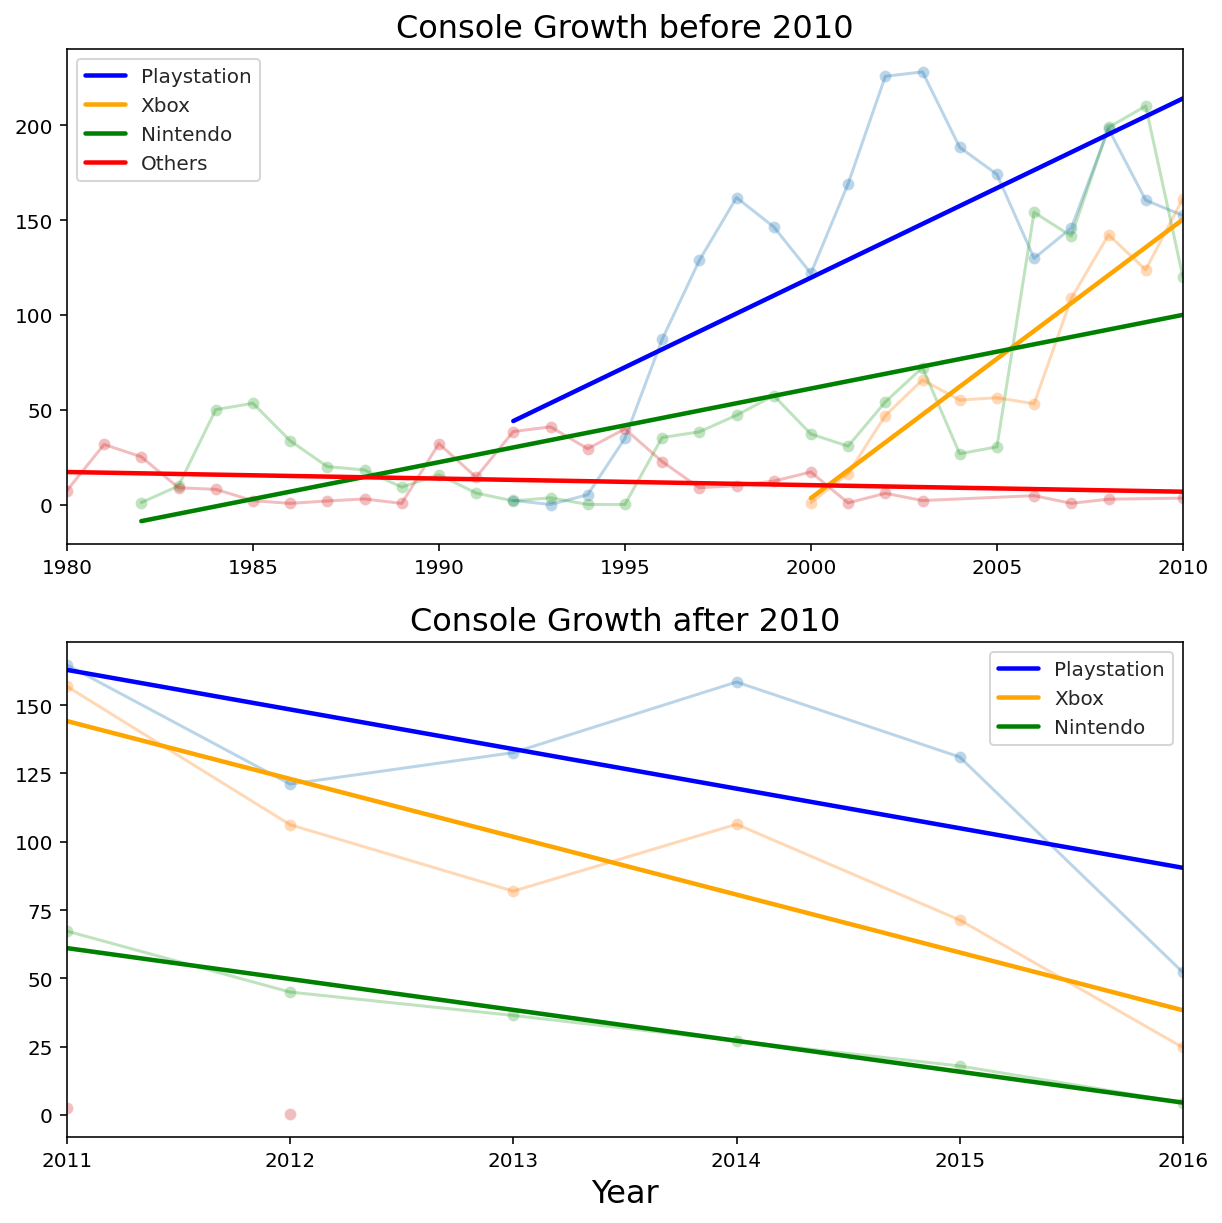

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (10,10));
#gridspec_kw={'width_ratios': [1.5, 1.2]}

sns.set_style('whitegrid');

ax1 = sns.scatterplot(x='Year', y='Playstation', data=b, alpha = 0.3, ax = ax[0]);
ax1 = sns.scatterplot(x='Year', y='Xbox', data=b,  alpha = 0.3, ax = ax[0]);
ax1 = sns.scatterplot(x='Year', y='Nintendo', data=b,  alpha = 0.3, ax = ax[0]);
ax1 = sns.scatterplot(x='Year', y='Others', data=b, alpha = 0.3, ax = ax[0]);
ax1 = sns.lineplot(x='Year', y='Playstation', markers=True, data=b, alpha = 0.3, ax = ax[0]);
ax1 = sns.lineplot(x='Year', y='Xbox', data=b,markers=True,  alpha = 0.3, ax = ax[0]);
ax1 = sns.lineplot(x='Year', y='Nintendo', data=b, markers=True,  alpha = 0.3, ax = ax[0]);
ax1 = sns.lineplot(x='Year', y='Others', data=b, markers=True, alpha = 0.3, ax = ax[0]);

# sns.set_color_codes("dark")
ax1 = sns.regplot(x='Year', y='Playstation', scatter=False, data=b, color = 'blue', robust=True, ci=None,label='Playstation', ax = ax[0]);
ax1 = sns.regplot(x='Year', y='Xbox', data=b,scatter=False, robust=True, color = 'orange', ci=None, label='Xbox', ax = ax[0]);
ax1 = sns.regplot(x='Year', y='Nintendo', data=b, scatter=False, robust=True, color = 'green', ci=None, label='Nintendo', ax = ax[0]);
ax1 = sns.regplot(x='Year', y='Others', data=b, scatter=False, robust=True,color = 'red', ci=None, label = 'Others', ax = ax[0]);
ax1.legend();
ax1.set_ylabel(None);
ax1.set_title('Console Growth before 2010', fontdict={'fontsize':16})
ax1.set_xlabel(None);

ax2 = sns.scatterplot(x='Year', y='Playstation', data=c, alpha = 0.3,ax = ax[1]);
ax2 = sns.scatterplot(x='Year', y='Xbox', data=c,  alpha = 0.3,ax = ax[1]);
ax2 = sns.scatterplot(x='Year', y='Nintendo', data=c,  alpha = 0.3,ax = ax[1]);
ax2 = sns.scatterplot(x='Year', y='Others', data=c, alpha = 0.3, ax = ax[1]);
ax2 = sns.lineplot(x='Year', y='Playstation', markers=True, data=c, alpha = 0.3,ax = ax[1]);
ax2 = sns.lineplot(x='Year', y='Xbox', data=c,markers=True,  alpha = 0.3,ax = ax[1]);
ax2 = sns.lineplot(x='Year', y='Nintendo', data=c, markers=True,  alpha = 0.3,ax = ax[1]);

# sns.set_color_codes("dark")
ax2 = sns.regplot(x='Year', y='Playstation', scatter=False, data=c, color = 'blue', robust=True, ci=None,label='Playstation',ax = ax[1]);
ax2 = sns.regplot(x='Year', y='Xbox', data=c,scatter=False, robust=True, color = 'orange', ci=None, label='Xbox',ax = ax[1]);
ax2 = sns.regplot(x='Year', y='Nintendo', data=c, scatter=False, robust=True, color = 'green', ci=None, label='Nintendo',ax = ax[1]);
ax2.legend();
ax2.set_ylabel(None);
ax2.set_xlabel('Year',fontdict={'fontsize':16});
ax2.set_title('Console Growth after 2010', fontdict={'fontsize':16});

* **Nintendo, Playstation, Xbox**는 시장에 나온 이후로 2010년까지 꾸준히 성장했다.
* 특히, **Xbox**는 2000년에 처음 시장에 등장하고 나서 가장 큰 성장세를 보여줬다.
* 2010년 이후 부터는 3개의 콘솔 전부 하락세를 보이고 있으며 사실상 Playstaion과 Xbox이 시장을 독식하고 있다.
* 새로운 콘솔 세대의 출시(**PS4, XONE**)로 이후는 지켜봐야한다.




In [ ]:
'''
def removeOutliers(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqt = 1.5 * (q3 - q1)
    y = x.copy()
    y[column][(y[column] > (q3 + iqt)) | (y[column] < (q1 - iqt))] = None
    return(y)

data1 = removeOutliers(data,'Global_Sales')
data1.dropna(inplace = True)
'''
 # 전체 데이터
genre = data.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].sum().reset_index()
genre_count = data["Genre"].value_counts().reset_index()
genre_count.rename(columns={"Genre": "Counts","index":"Genre"}, inplace=True)
genre = pd.merge(genre,genre_count,on="Genre")

NA_Genre = genre[['Genre','NA_Sales','Global_Sales']]
EU_Genre = genre[['Genre','EU_Sales','Global_Sales']]
JP_Genre = genre[['Genre','JP_Sales','Global_Sales']]
Others_Genre = genre[['Genre','Other_Sales','Global_Sales']]

# 5년 데이터
data_10 = data[data.Year >= 2010]

genre_10 = data_10.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].sum().reset_index()
genre_count_10 = data_10["Genre"].value_counts().reset_index()
genre_count_10.rename(columns={"Genre": "Counts","index":"Genre"}, inplace=True)
genre_10 = pd.merge(genre_10,genre_count_10,on="Genre")

NA_Genre_10 = genre_10[['Genre','NA_Sales','Global_Sales']]
EU_Genre_10 = genre_10[['Genre','EU_Sales','Global_Sales']]
JP_Genre_10 = genre_10[['Genre','JP_Sales','Global_Sales']]
Others_Genre_10 = genre_10[['Genre','Other_Sales','Global_Sales']]

NA_Genre = genre[['Genre','NA_Sales','Global_Sales']]
EU_Genre = genre[['Genre','EU_Sales','Global_Sales']]
JP_Genre = genre[['Genre','JP_Sales','Global_Sales']]
Other_Genre = genre[['Genre','Other_Sales','Global_Sales']]

In [ ]:
pal = ['#50d890', '#007944','#888888','#f3c623','#EFEFEF', '#96bb7c', '#d9bf77','#3f3f44']

x = genre.Genre
NA = list(genre["NA_Sales"]/genre["Global_Sales"]*100)
EU = list(genre["EU_Sales"]/genre["Global_Sales"]*100)
JP = list(genre["JP_Sales"]/genre["Global_Sales"]*100)
Other = list(genre["Other_Sales"]/genre["Global_Sales"]*100)



fig = make_subplots(rows = 1, cols = 1)

#fig.add_trace(go.Scatter(x = x, y =  genre["NA_Sales"], mode="lines+markers",  name='North America'))
#fig.add_trace(go.Scatter(x = x, y =  genre["EU_Sales"], mode="lines+markers", name='EU'))
#fig.add_trace(go.Scatter(x = x, y =  genre["JP_Sales"], mode="lines+markers",  name='Japan'))
#fig.add_trace(go.Scatter(x = x, y =  genre["Other_Sales"], mode="lines+markers", name='Others'))
# fig.add_trace(go.Scatter(x = x, y =  genre["Global_Sales"], mode="lines+markers",  name='Global'))

fig.add_trace(go.Bar(
    x=x,
    y=NA,
    name="North America" ,
    xaxis='x2', yaxis='y2',
    opacity=0.75),)

fig.add_trace(go.Bar(
    x=x,
    y=EU,
    name="EU" ,
    xaxis='x2', yaxis='y2',
    opacity=0.75))

fig.add_trace(go.Bar(
    x=x,
    y=JP,
    name="Japan" ,
    xaxis='x2', yaxis='y2',
    opacity=0.75),)

fig.add_trace(go.Bar(
    x=x,
    y=Other,
    name="Other" ,
    xaxis='x2', yaxis='y2',
    opacity=0.75))

fig.update_layout(template = "plotly_white", title="Prefered Genre by Region",
        width=800,
        height=500,
       )

fig.update_layout(barmode='stack')

po.write_html(fig, file ='./Prefered Genre.html')
fig.show()

In [ ]:
NA_top5 = NA_Genre.sort_values('NA_Sales',ascending=False).head(5)
NA_top5_10 = NA_Genre_10.sort_values('NA_Sales',ascending=False).head(5)
EU_top5 = EU_Genre.sort_values('EU_Sales',ascending=False).head(5)
EU_top5_10 = EU_Genre_10.sort_values('EU_Sales',ascending=False).head(5)
JP_top5 = JP_Genre.sort_values('JP_Sales',ascending=False).head(5)
JP_top5_10 = JP_Genre_10.sort_values('JP_Sales',ascending=False).head(5)
Other_top5 = Others_Genre.sort_values('Other_Sales',ascending=False).head(5)
Other_top5_10 = Others_Genre_10.sort_values('Other_Sales',ascending=False).head(5)

fig = go.Figure()
fig.add_trace(go.Pie(labels=NA_top5.Genre, values = NA_top5.NA_Sales, pull=[0.1,0,0,0,0]))
fig.add_trace(go.Pie(labels=EU_top5.Genre, values = EU_top5.EU_Sales, pull=[0.1,0,0,0,0]))
fig.add_trace(go.Pie(labels=JP_top5.Genre, values = JP_top5.JP_Sales,pull=[0.1,0,0,0,0]))
fig.add_trace(go.Pie(labels=Other_top5.Genre, values = Other_top5.Other_Sales, pull=[0.1,0,0,0,0]))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=list([
                dict(label="North America",
                     method="update",
                     args=[{"visible": [True, False,False,False]}]), 
                dict(label="EU",
                     method="update",
                     args=[{"visible": [False, True, False, False]}]),
                     dict(label="Japan",
                     method="update",
                     args=[{"visible": [False, False,True,False]}]),
                     dict(label="Other",
                     method="update",
                     args=[{"visible": [False, False,False,True]}])]))])

fig.update_layout(template = "plotly_white", title_text="Top5 Prefered Genre by Region",
        width=800,
        height=600,
        showlegend=False
       )
fig.update_traces(hoverinfo='label+percent', textinfo='label', textfont_size=13)

po.write_html(fig, file ='./Top5.html')
fig.show()

In [ ]:
data[data.Genre == 'Action'].groupby('Year')['Global_Sales'].sum().reset_index()

Year  Global_Sales
0   1980          0.34
1   1981         11.66
2   1982          9.44
3   1983          2.86
4   1984          1.85
5   1985          3.52
6   1986         12.59
7   1987          2.26
8   1988          1.74
9   1989          0.48
10  1990          6.39
11  1991          9.46
12  1992          3.84
13  1993          1.81
14  1994          1.55
15  1995          3.58
16  1996         18.23
17  1997         21.55
18  1998         51.11
19  1999         26.10
20  2000         35.38
21  2001         35.96
22  2002         84.10
23  2003        104.74
24  2004         57.72
25  2005         87.52
26  2006         68.15
27  2007        111.50
28  2008        167.08
29  2009        136.99
30  2010        121.87
31  2011        126.75
32  2012        127.99
33  2013         93.24
34  2014        129.34
35  2015         71.90
36  2016         20.49

In [ ]:

fig = go.Figure()

for i in list(data.Genre.unique()):
  genre_year = data[data.Genre == i].groupby('Year')['Global_Sales'].sum().reset_index()
  fig.add_trace(go.Scatter(x=genre_year.Year, y =genre_year['Global_Sales'],name = i))

fig.update_layout(template = "plotly_white", title_text="Genre",
        width=800,
        height=500)

po.write_html(fig, file ='./Genre.html')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=NA_top5_10.Genre, values = NA_top5_10.NA_Sales, pull=[0.1,0,0,0,0]))
fig.add_trace(go.Pie(labels=EU_top5_10.Genre, values = EU_top5_10.EU_Sales, pull=[0.1,0,0,0,0]))
fig.add_trace(go.Pie(labels=JP_top5_10.Genre, values = JP_top5_10.JP_Sales,pull=[0.1,0,0,0,0]))
fig.add_trace(go.Pie(labels=Other_top5_10.Genre, values = Other_top5_10.Other_Sales, pull=[0.1,0,0,0,0]))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=list([
                dict(label="North America",
                     method="update",
                     args=[{"visible": [True, False,False,False]}]), 
                dict(label="EU",
                     method="update",
                     args=[{"visible": [False, True, False, False]}]),
                     dict(label="Japan",
                     method="update",
                     args=[{"visible": [False, False,True,False]}]),
                     dict(label="Other",
                     method="update",
                     args=[{"visible": [False, False,False,True]}])]))])

fig.update_layout(template = "plotly_white", title_text="Top5 Prefered Genre by Region after 2010",
        width=900,
        height=600,
        showlegend=False
       )
fig.update_traces(hoverinfo='label+percent', textinfo='label', textfont_size=13)

po.write_html(fig, file ='./Genre2.html')
fig.show()

In [ ]:
data.corr()

Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year          1.000000 -0.083101  0.011216 -0.158946     0.045555     -0.066083
NA_Sales     -0.083101  1.000000  0.767725  0.449786     0.634736      0.941049
EU_Sales      0.011216  0.767725  1.000000  0.435583     0.726384      0.902838
JP_Sales     -0.158946  0.449786  0.435583  1.000000     0.290184      0.611820
Other_Sales   0.045555  0.634736  0.726384  0.290184     1.000000      0.748350
Global_Sales -0.066083  0.941049  0.902838  0.611820     0.748350      1.000000

In [ ]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

fig = go.Figure()
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
fig.add_trace(go.Pie(labels=labels, values = sizes, pull=[0.01,0,0,0]))

fig.update_layout(template = "plotly_white", title_text="Region Sales",
        width=800,
        height=600,
        showlegend=False
       )
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=13)

po.write_html(fig, file ='./Region Sales.html')
fig.show()

* 데이터 칼럼간의 상관계수를 계산했을 때 전세계 게임 판매량과 미국의 판매량이 연관성이 가장 큰 것으로 나타났고 그 다음으로 유럽, 일본 순으로 연관성이 있는 것으로 나타났다.
* 전세계 게임 판매량 중에 미국에서의 판매량이 50%이상을 차지 하고 있기 때문
* 그 만큼 미국 게임 시장은 중요함.

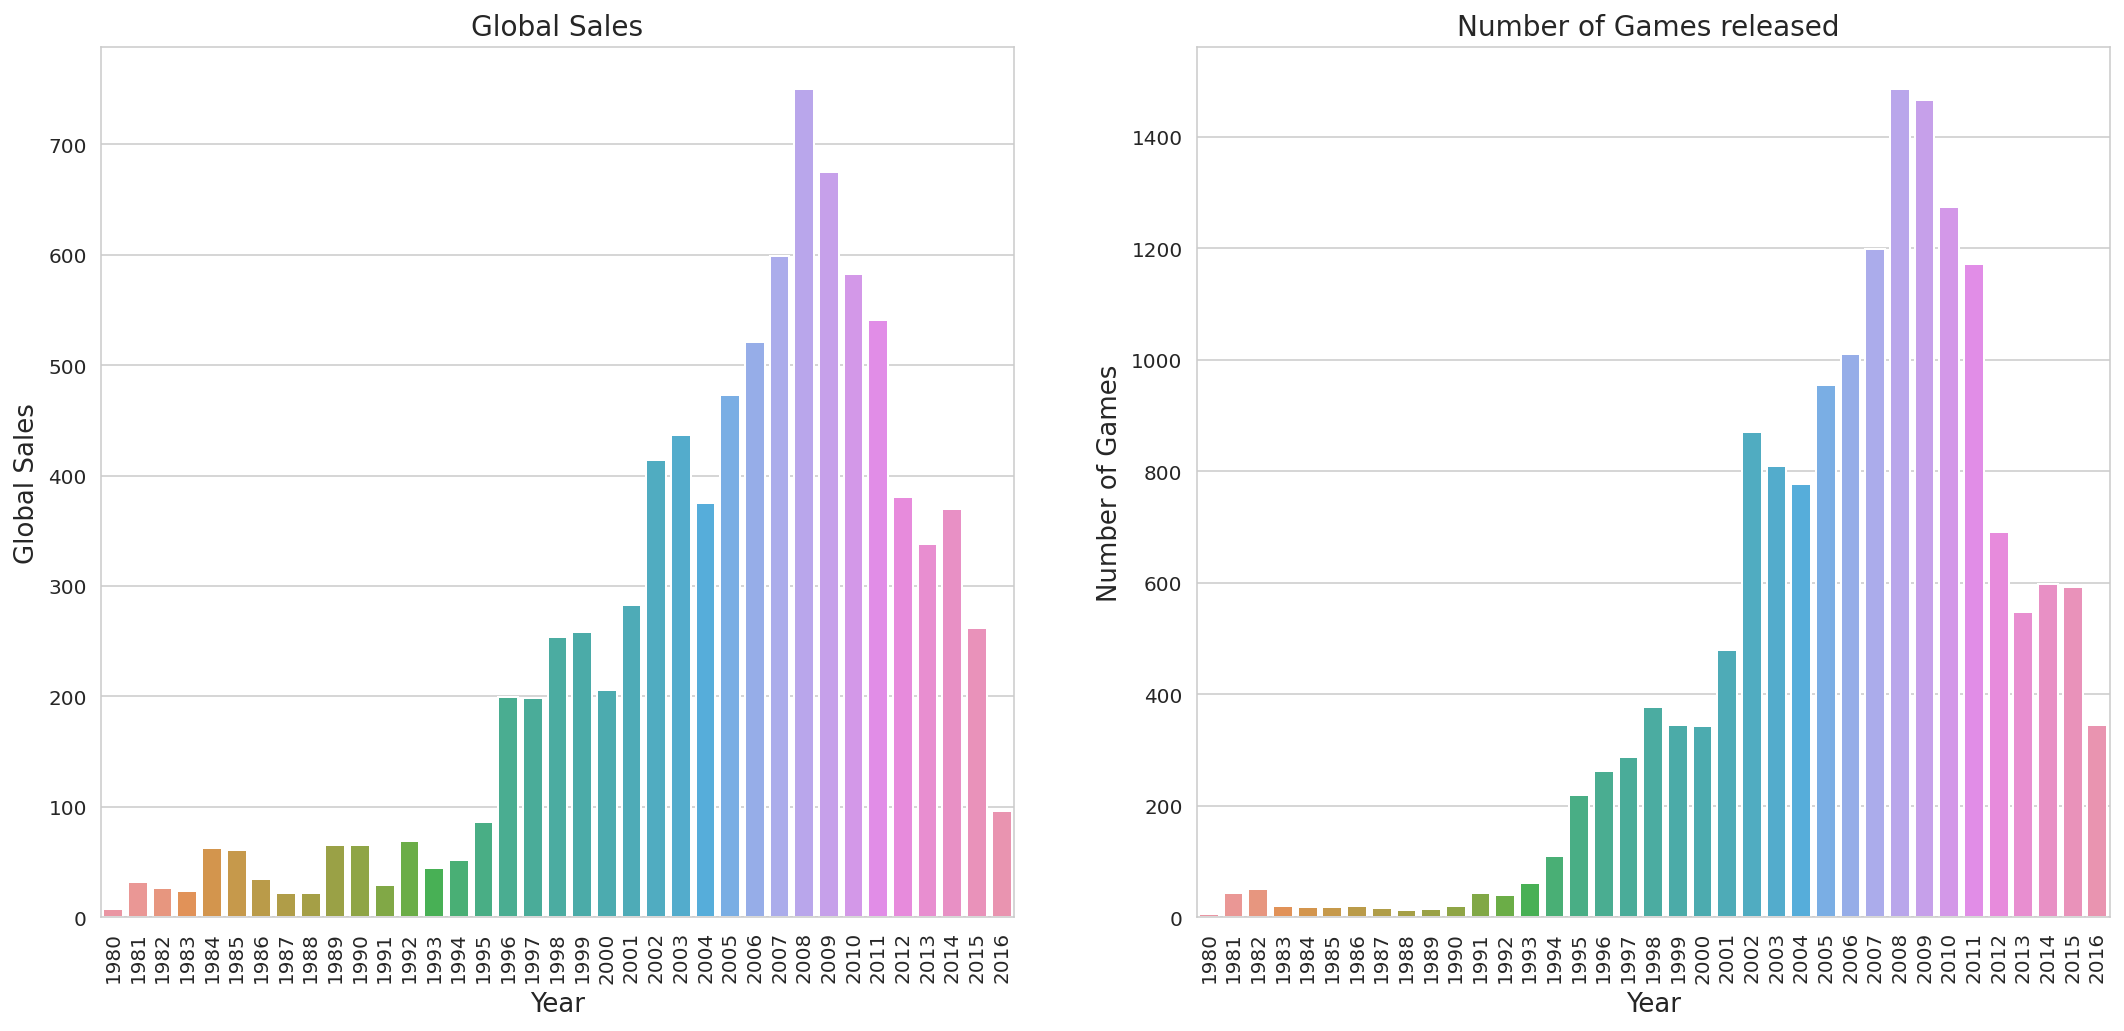

In [ ]:
Sales = data.groupby(data['Year'].sort_values()).sum().Global_Sales.reset_index()
Count = data.Year.value_counts()

fig=plt.figure(figsize=(18,8))
plt.subplots_adjust(left=None, wspace=None, hspace=None)
sns.set_style("whitegrid")

plt.subplot(1, 2, 1)
plt.title('Global Sales',fontdict={'fontsize':14})
plt.xticks(rotation=90)
sns.barplot(x='Year',y='Global_Sales',data=Sales)
plt.ylabel('Global Sales',fontdict={'fontsize':13})
plt.xlabel('Year',fontdict={'fontsize':13})

plt.subplot(1, 2, 2)
plt.title('Number of Games released ',fontdict={'fontsize':14})
plt.xticks(rotation=90)
sns.barplot(x=Count.index, y=Count);
plt.ylabel('Number of Games',fontdict={'fontsize':13})
plt.xlabel('Year',fontdict={'fontsize':13});

In [ ]:
Year = data.groupby(data['Year']).apply(lambda x: pd.Series({'Count': x['Name'].count(),'Global_Sales': x['Global_Sales'].sum()})).reset_index()
Scaler = StandardScaler()
Year_scaler = pd.concat([Year['Year'],pd.DataFrame(Scaler.fit_transform(Year[['Count','Global_Sales']]),columns=['Count', 'Global_Sales'])],axis=1)
fig = go.Figure(data=[go.Scatter(x=Year_scaler['Year'], y=Year_scaler['Count'], mode='lines+markers',name='# of Games Released',marker = dict(size=8), text=Year['Count']),
go.Scatter(x=Year_scaler['Year'], y=Year_scaler['Global_Sales'], mode='lines+markers',name='# of Games Sales',marker = dict(size=8), text=Year['Global_Sales'])])

fig.update_layout(template = "plotly_white", title_text="Relationship between Number of Releases and Global Sales",
        width=1000,
        height=600)

po.write_html(fig, file ='./Relationship_R_G.html')
fig.show()

In [ ]:
top_publisher = data.groupby('Publisher')['Global_Sales'].count().sort_values(ascending = False)
top_publisher = top_publisher.reset_index()

In [ ]:
top_publisher = data.groupby('Publisher')['Global_Sales'].count().sort_values(ascending = False).head(20)
top_publisher = top_publisher.reset_index()
top_publisher2 = data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending = False).head(20)
top_publisher2 = top_publisher2.reset_index()


fig = go.Figure()
labels = top_publisher['Publisher']
sizes = top_publisher['Global_Sales']
fig.add_trace(go.Bar(x=labels, y = sizes))

labels2 = top_publisher2['Publisher']
sizes2 = top_publisher2['Global_Sales']
fig.add_trace(go.Bar(x=labels2, y = sizes2))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=list([
                dict(label="Game count by publisher",
                     method="update",
                     args=[{"visible": [True, False]}]), 
                dict(label="Sales by publisher",
                     method="update",
                     args=[{"visible": [False, True]}])]))])

fig.update_layout(template = "plotly_white", title_text="Publisher",
        width=800,
        height=600,
        showlegend=False
       )
po.write_html(fig, file ='./Publisher.html')
fig.show()

In [ ]:
data2 = data.copy()
data2.sort_values('Global_Sales',ascending=False).head(20)

Name  ... Console_Type
2908                                     Wii Sports  ...     Nintendo
4199                              Super Mario Bros.  ...     Nintendo
12579                                Mario Kart Wii  ...     Nintendo
3352                              Wii Sports Resort  ...     Nintendo
7829                       Pokemon Red/Pokemon Blue  ...    Handhelds
1203                                         Tetris  ...    Handhelds
6937                          New Super Mario Bros.  ...    Handhelds
3014                                       Wii Play  ...     Nintendo
16531                     New Super Mario Bros. Wii  ...     Nintendo
10488                                     Duck Hunt  ...     Nintendo
11137                                    Nintendogs  ...    Handhelds
10650                                 Mario Kart DS  ...    Handhelds
9416                    Pokemon Gold/Pokemon Silver  ...    Handhelds
3435                                        Wii Fit  ...     Nintendo
10899                                  Wii Fit Plus  ...     Nintendo
4343                             Kinect Adventures!  ...         Xbox
3483                             Grand Theft Auto V  ...  Playstation
14669                 Grand Theft Auto: San Andreas  ...  Playstation
13111                             Super Mario World  ...       Others
13229  Brain Age: Train Your Brain in Minutes a Day  ...    Handhelds

[20 rows x 12 columns]

In [ ]:
pd.crosstab(data['Publisher'],data['Genre']).T['Electronic Arts'].sort_values(ascending = False).head(5)

Genre
Sports        568
Action        184
Racing        159
Shooter       143
Simulation    116
Name: Electronic Arts, dtype: int64

In [ ]:
pd.crosstab(data['Publisher'],data['Genre']).T['Activision'].sort_values(ascending = False).head(5)

Genre
Action     317
Shooter    167
Sports     143
Misc       104
Racing      73
Name: Activision, dtype: int64

In [ ]:
pd.crosstab(data['Publisher'],data['Genre']).T['Namco Bandai Games'].sort_values(ascending = False).head(5)

Genre
Action          253
Role-Playing    150
Fighting        134
Misc             98
Strategy         61
Name: Namco Bandai Games, dtype: int64

# PROJECT


---



## 들어가며
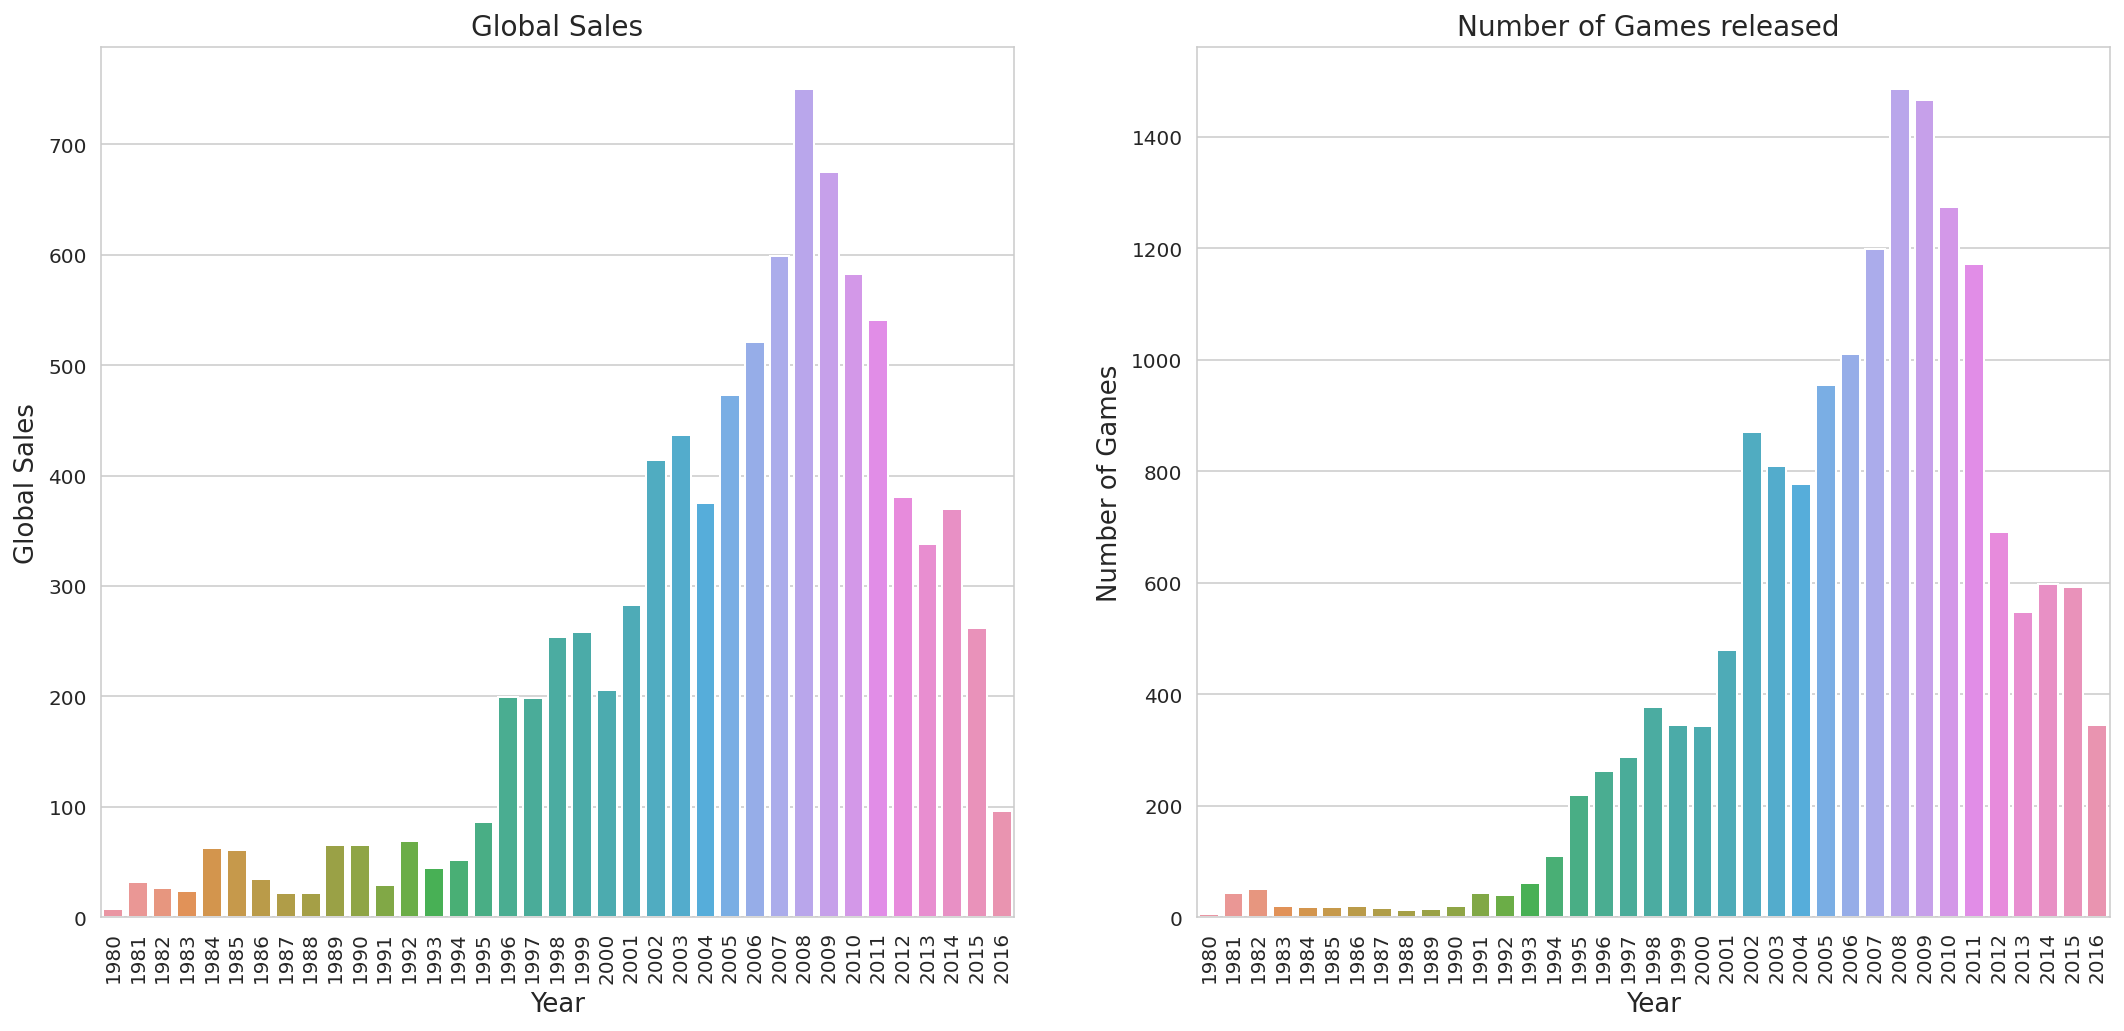


1980년에 처음 가정용 비디오 게임이 대중에게 소개되고 인기를 얻은 이후로 정말 많은 시간이 흘렀습니다. 이번 프로젝트에서는 1980~2016년까지의 비디오 게임 출고량 데이터를 시각화를 통해 분석해보고 여기서 얻은 결과를 토대로  **앞으로 어떤 게임을 출시하는 것이 게임 시장에서 유리한가?** 알아보고자 한다.

## 분석







### 1. 게임 시장과 기술의 발전의 연관성

In [ ]:
z = data.pivot_table(index='Year', columns='Platform_Type', values='Global_Sales', aggfunc = 'count', fill_value=0)
z.columns.name = None
z = z.reset_index()

z['Consoles'] = z['Consoles'].rolling(min_periods=1, window=11).sum()
z['PC'] = z['PC'].rolling(min_periods=1, window=11).sum()
z['Handhelds'] = z['Handhelds'].rolling(min_periods=1, window=11).sum()

x = z.Year
Console = z.Consoles
PC = z.PC
Handhelds = z.Handhelds

fig = make_subplots(rows = 1, cols = 1)

#fig.add_trace(go.Scatter(x = x, y =  genre["NA_Sales"], mode="lines+markers",  name='North America'))
#fig.add_trace(go.Scatter(x = x, y =  genre["EU_Sales"], mode="lines+markers", name='EU'))
#fig.add_trace(go.Scatter(x = x, y =  genre["JP_Sales"], mode="lines+markers",  name='Japan'))
#fig.add_trace(go.Scatter(x = x, y =  genre["Other_Sales"], mode="lines+markers", name='Others'))
# fig.add_trace(go.Scatter(x = x, y =  genre["Global_Sales"], mode="lines+markers",  name='Global'))

fig.add_trace(go.Bar(
    x=x,
    y=Console,
    name="Consoles" ,
    xaxis='x2', yaxis='y2',
    opacity=0.75),)

fig.add_trace(go.Bar(
    x=x,
    y=Handhelds,
    name="Handhelds" ,
    xaxis='x2', yaxis='y2',
    opacity=0.75))

fig.add_trace(go.Bar(
    x=x,
    y=PC,
    name="PC" ,
    xaxis='x2', yaxis='y2',
    opacity=0.75),)

fig.update_layout(template = "plotly_white", title="Platform Growth",
        width=900,
        height=600,
       )

fig.update_layout(barmode='stack')

po.write_html(fig, file ='./Platform Growth.html')
fig.show()

* 비디오 게임 플랫폼은 크게 3가지 타입으로 나눌 수 있다. **(콘솔, 휴대용, PC)**
* 80년대부터 90년대까지는 비디오 게임은 콘솔 타입만 존재 
* 시간이 지나면서 휴대용 기기와 PC가 발전하면서 관심을 받기 시작
* 2000년 이후 기술이 발전으로 PC & 휴대용 게임은 크게 성장했다..
* 여전히 게임 시장에서 콘솔이 차지하는 부분은 매우 크지만 앞으로 기술이 더욱 발전하면서 PC와 휴대용 게임이 차지하는 부분은 더 늘어날 것이다.
* 게임과 기술의 발전은 아주 밀접한 연관이 있다


In [ ]:
z = data.pivot_table(index='Year', columns='Platform_Type', values='Global_Sales', aggfunc = 'count', fill_value=0)
z.columns.name = None
z = z.reset_index()

fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(go.Scatter(x = z.Year, y =  z['Consoles'], mode="lines+markers",  name='Consoles'))
fig.add_trace(go.Scatter(x = z.Year, y =  z['Handhelds'], mode="lines+markers", name='Handhelds'))
fig.add_trace(go.Scatter(x = z.Year, y =  z['PC'], mode="lines+markers",  name='PC'))


fig.add_trace(go.Scatter(x=[2011],y=[830],text=["스마트폰의 보급"],mode="text",name = "2009~2013년"))

fig.update_layout(template = "plotly_white", title= "Console",shapes=[
    dict(
      type= 'rect',
      x0=2009, y0=0, x1=2013, y1=800, opacity = 0.25, line_color="Purple", fillcolor="Purple"
    )], width = 1000, height=500,
       )

po.write_html(fig, file ='./Console.html')
fig.show()

* 게임 시장은 2008년도까지 꾸준히 성장
* PlayStation 2 (2000) , Nintendo DS (2004) , Wii (2005) , XBox360 (2005) 및 PlayStation 3 (2006)와 같이 계속된 새로운 플랫폼이 출시되고 게임들이 여러 플랫폼에서 출시되면서 이기간 동안 많은 양의 비디오 게임들이 시장에 나오고 덩달아 매출도 상승 -> 멀티플랫폼과 게임 판매량의 관계
* 하지만 **2009년부터 게임 시장은 하락세**를 보임 
* 이는 **스마트폰의 영향력 증가**와 연관있다고 보인다.
* 실제로 이 기간동안 전세계 스마트폰 보급률이 상당히 증가 (10% -> 60%이상)
* 게임 개발자들은 휴대 가능하고 많은 사람들이 소유하는 스마트 폰 플랫폼에서 출시하기 시작 (2009년 **Angry Birds, Plants VS Zombies** 같은 인기 게임들이 스마트폰에서 출시)
* 2013년도 **차세대 게임기(PS4, Xbox ONE)**가 등장하면서 약간이지만 상승
* 앞서 말한 것과 같이 게임 시장의 발전은 기술과 밀접한 연관이 있기에 새로운 기술의 등장과 같은 외부요인은 위협이 될 수도 있고 기회가 될 수 있다.
* 앞으로 나올 VR기기나 증강 현실 게임의 발전도 비디오 게임 시장에 어떠한 영향을 줄 지 지켜봐야한다.

### 2. 어떤 플랫폼이 유리한가?

In [ ]:
z = data.pivot_table(index='Year', columns='Console_Type', values='Global_Sales', aggfunc = 'count', fill_value=0)
z.columns.name = None
z = z.reset_index()

fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(go.Scatter(x = z.Year, y =  z['Playstation'], mode="lines+markers",  name='Playstation'))
fig.add_trace(go.Scatter(x = z.Year, y =  z['Xbox'], mode="lines+markers", name='Xbox'))
fig.add_trace(go.Scatter(x = z.Year, y =  z['Nintendo'], mode="lines+markers",  name='Nintendo'))
fig.add_trace(go.Scatter(x = z.Year, y =  z['Others'], mode="lines+markers", name='Others'))

#fig = px.line(data)
#fig.add_hline(x=2000, col=a; line_width=3, line_dash="dash", line_color="green", annotation_text = 'Playstation 2')

fig.add_trace(go.Scatter(x=[2000],y=[350],text=["PS2,Xbox"],mode="text",name = "2000년"))
fig.add_trace(go.Scatter(x=[2005],y=[350],text=["X360 PS3"],mode="text",name = "2005, 2006년"))
fig.add_trace(go.Scatter(x=[2013],y=[350],text=["PS4,XOne 출시"],mode="text",name = "2013년"))

fig.update_layout(template = "plotly_white", title= "Console",shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 0.9,
      xref= 'x', x0= 2000, x1= 2000, opacity = 0.25, line_color="Purple"
    )], width = 1000, height=500,
       )

fig.add_shape(type= 'line',
      yref= 'paper', y0= 0, y1= 0.9,
      xref= 'x', x0= 2006, x1= 2006, opacity = 0.25, line_color="Blue"
    )

fig.add_shape(type= 'line',
      yref= 'paper', y0= 0, y1= 0.9,
      xref= 'x', x0= 2005, x1= 2005, opacity = 0.25, line_color="Red"
    )

fig.add_shape(type= 'line',
      yref= 'paper', y0= 0, y1= 0.9,
      xref= 'x', x0= 2013, x1= 2013, opacity = 0.25, line_color="Purple"
    )

po.write_html(fig, file ='./Console2.html')
fig.show()

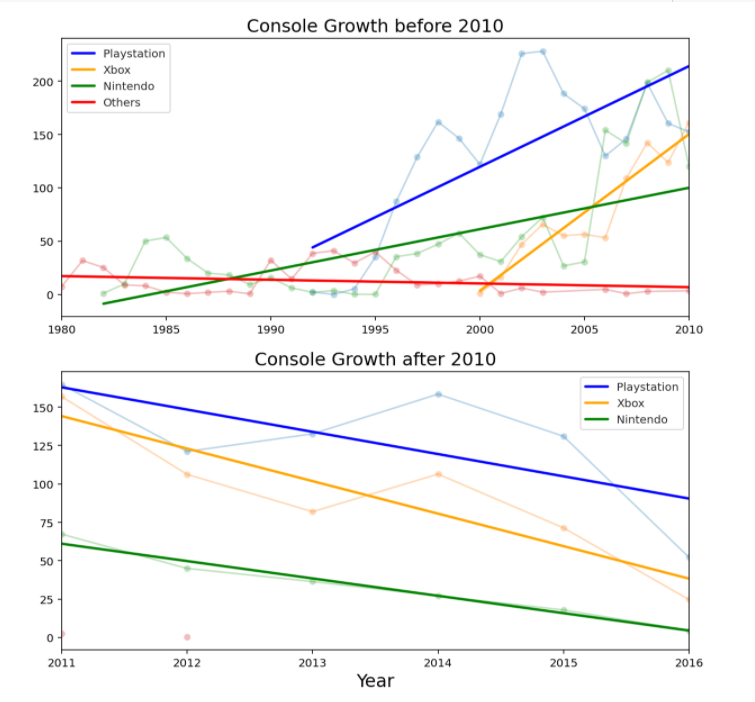

* 콘솔 게임 시장은 Xbox시리즈와 Playstation시리즈로 양분화 
* 어떠한 차세대 게임기가 나오냐에 따라 달라지겠지만 이 데이터 상으로는 Xbox와 Playstaion의 멀티플랫폼을 지원하는 
게임을 출시하는 것이 좋다

### 3. 나라별 장르 선호

In [ ]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

fig = go.Figure()
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
fig.add_trace(go.Pie(labels=labels, values = sizes, pull=[0.01,0,0,0]))

fig.update_layout(template = "plotly_white", title_text="Region Sales",
        width=800,
        height=600,
        showlegend=False
       )
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=13)

po.write_html(fig, file ='./Region Sales.html')
fig.show()

* 게임 시장의 판매량은 미국, 유럽, 일본이 차지
* 각 지역별 유저들의 장르 선호도를 분석해보고 어떤 장르의 게임을 출시하는 것이 좋을지 확인 

In [ ]:
NA_top5 = NA_Genre.sort_values('NA_Sales',ascending=False).head(5)
NA_top5_10 = NA_Genre_10.sort_values('NA_Sales',ascending=False).head(5)
EU_top5 = EU_Genre.sort_values('EU_Sales',ascending=False).head(5)
EU_top5_10 = EU_Genre_10.sort_values('EU_Sales',ascending=False).head(5)
JP_top5 = JP_Genre.sort_values('JP_Sales',ascending=False).head(5)
JP_top5_10 = JP_Genre_10.sort_values('JP_Sales',ascending=False).head(5)
Other_top5 = Others_Genre.sort_values('Other_Sales',ascending=False).head(5)
Other_top5_10 = Others_Genre_10.sort_values('Other_Sales',ascending=False).head(5)

fig = go.Figure()
fig.add_trace(go.Pie(labels=NA_top5.Genre, values = NA_top5.NA_Sales, pull=[0.1,0,0,0,0]))
fig.add_trace(go.Pie(labels=EU_top5.Genre, values = EU_top5.EU_Sales, pull=[0.1,0,0,0,0]))
fig.add_trace(go.Pie(labels=JP_top5.Genre, values = JP_top5.JP_Sales,pull=[0.1,0,0,0,0]))
fig.add_trace(go.Pie(labels=Other_top5.Genre, values = Other_top5.Other_Sales, pull=[0.1,0,0,0,0]))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=list([
                dict(label="North America",
                     method="update",
                     args=[{"visible": [True, False,False,False]}]), 
                dict(label="EU",
                     method="update",
                     args=[{"visible": [False, True, False, False]}]),
                     dict(label="Japan",
                     method="update",
                     args=[{"visible": [False, False,True,False]}]),
                     dict(label="Other",
                     method="update",
                     args=[{"visible": [False, False,False,True]}])]))])

fig.update_layout(template = "plotly_white", title_text="Top5 Prefered Genre by Region",
        width=800,
        height=600,
        showlegend=False
       )
fig.update_traces(hoverinfo='label+percent', textinfo='label', textfont_size=13)

po.write_html(fig, file ='./Top5.html')
fig.show()

* 북미: 액션, 스포츠, 슈팅
* 유럽: 액션, 스포츠, 슈팅
* 일본: 롤 플레잉, 액션, 스포츠
* 다른 지역: 액션, 스포츠, 슈팅




In [ ]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=NA_top5_10.Genre, values = NA_top5_10.NA_Sales, pull=[0.1,0,0,0,0]))
fig.add_trace(go.Pie(labels=EU_top5_10.Genre, values = EU_top5_10.EU_Sales, pull=[0.1,0,0,0,0]))
fig.add_trace(go.Pie(labels=JP_top5_10.Genre, values = JP_top5_10.JP_Sales,pull=[0.1,0,0,0,0]))
fig.add_trace(go.Pie(labels=Other_top5_10.Genre, values = Other_top5_10.Other_Sales, pull=[0.1,0,0,0,0]))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=list([
                dict(label="North America",
                     method="update",
                     args=[{"visible": [True, False,False,False]}]), 
                dict(label="EU",
                     method="update",
                     args=[{"visible": [False, True, False, False]}]),
                     dict(label="Japan",
                     method="update",
                     args=[{"visible": [False, False,True,False]}]),
                     dict(label="Other",
                     method="update",
                     args=[{"visible": [False, False,False,True]}])]))])

fig.update_layout(template = "plotly_white", title_text="Top5 Prefered Genre by Region after 2010",
        width=900,
        height=600,
        showlegend=False
       )
fig.update_traces(hoverinfo='label+percent', textinfo='label', textfont_size=13)

po.write_html(fig, file ='./Genre2.html')
fig.show()

### 4. 퍼블리셔와 높은 출고량 게임의 연관성

In [ ]:
fig = make_subplots(rows = 2, cols = 1)
fig.add_trace(go.Scatter(x=data["Year"], y=data["Global_Sales"],mode = 'markers', text= data.Name, name = 'Global Sales'), row=1, col=1
)

fig.add_trace(go.Scatter(x=data["Genre"], y=data["Global_Sales"],mode = 'markers', text= data.Name, name = 'Genre Sales'),  row=2, col=1
)

fig.update_layout(template = "plotly_white", title="Game",)

높은 출고량의 게임들의 공통점 -> 닌텐도

In [ ]:
top_publisher = data.groupby('Publisher')['Global_Sales'].count().sort_values(ascending = False).head(20)
top_publisher = top_publisher.reset_index()
top_publisher2 = data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending = False).head(20)
top_publisher2 = top_publisher2.reset_index()


fig = go.Figure()
labels = top_publisher['Publisher']
sizes = top_publisher['Global_Sales']
fig.add_trace(go.Bar(x=labels, y = sizes))

labels2 = top_publisher2['Publisher']
sizes2 = top_publisher2['Global_Sales']
fig.add_trace(go.Bar(x=labels2, y = sizes2))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=list([
                dict(label="Game count by publisher",
                     method="update",
                     args=[{"visible": [True, False]}]), 
                dict(label="Sales by publisher",
                     method="update",
                     args=[{"visible": [False, True]}])]))])

fig.update_layout(template = "plotly_white", title_text="Publisher",
        width=800,
        height=600,
        showlegend=False
       )
po.write_html(fig, file ='./Publisher.html')
fig.show()

* 닌텐도의 경우 가장 높은 판매량을 보이고 있지만 게임 출시는 상대적으로 많지 않은 편
* 그에 비해 Electrinic Arts와 Activision은 높은 판매량과 출시량을 보이고 있다.

In [ ]:
pd.crosstab(data['Publisher'],data['Genre']).T['Nintendo'].sort_values(ascending = False).head(5)

Genre
Platform        112
Role-Playing    108
Misc             98
Action           80
Puzzle           73
Name: Nintendo, dtype: int64

In [ ]:
pd.crosstab(data['Publisher'],data['Genre']).T['Electronic Arts'].sort_values(ascending = False).head(5)

Genre
Sports        568
Action        184
Racing        159
Shooter       143
Simulation    116
Name: Electronic Arts, dtype: int64

In [ ]:
pd.crosstab(data['Publisher'],data['Genre']).T['Activision'].sort_values(ascending = False).head(5)

Genre
Action     317
Shooter    167
Sports     143
Misc       104
Racing      73
Name: Activision, dtype: int64

* EA는 스포츠 장르를 Activision은 액션 장르를 선호
* 각 퍼블리셔마다 장단점 특징들이 있겠지만 action 장르와 스포츠 장르에 있어서는 EA와 액티비젼이 유리하다고 보임





## 결론:

* 어떤 게임을 출시해야하는가???
    * 최신 기기에서 실행 가능
    * 멀티 플랫폼 지원 (PC, Playstation, Xbox)
    * 액션, 스포츠, 슈팅 게임
    * 위에 장르로 퍼블리싱을 계약을 하게 된다면 EA와 Activision